# Herkenning van handgeschreven cijfers met Deep Learning 2

## Convolutionele Neurale Netwerken

Stijn Oomes

donderdag 15 september 2021

## Importeer libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

2023-02-15 21:29:56.478045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [5]:
train_labels.shape

(60000,)

## Prepareer de images

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images_normalized = train_images.astype('float32')/255

In [8]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [9]:
train_images_enhanced.shape

(60000, 28, 28, 1)

In [10]:
test_images_normalized = test_images.astype('float32')/255
test_images_enhanced = test_images_normalized.reshape(10000,28,28,1)

In [11]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

**OPDRACHT**: introduceer "one-hot encoding" voor de labels (zowel train set als de test set)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [14]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Definieeer netwerk / model

**OPDRACHT**: voeg nog een convolutie laag en nog een volledig verbonden laag toe

In [15]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))
cnn.add(AveragePooling2D())

# ???
cnn.add(Conv2D(filters=64,
                         kernel_size=(3, 3),
                         activation='relu'))
cnn.add(AveragePooling2D())
cnn.add(Flatten())
cnn.add(Dropout(0.5))

# ???
cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))

2023-02-15 21:30:45.389765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

**OPDRACHT**: meet hoe lang het trainen duurt


In [18]:
history_cnn = cnn.fit(train_images_enhanced,
        train_labels_encoded,
        epochs = 3,
        batch_size = 128,
        validation_data = (test_images_enhanced, test_labels_encoded))

Epoch 1/3
469/469 [==============================] - 21s 43ms/step - loss: 0.3542 - accuracy: 0.8900 - val_loss: 0.0928 - val_accuracy: 0.9727
Epoch 2/3
469/469 [==============================] - 21s 45ms/step - loss: 0.1138 - accuracy: 0.9650 - val_loss: 0.0590 - val_accuracy: 0.9818
Epoch 3/3
469/469 [==============================] - 20s 42ms/step - loss: 0.0865 - accuracy: 0.9735 - val_loss: 0.0481 - val_accuracy: 0.9853


**OPDRACHT**: meet hoe lang het testen duurt

In [19]:
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)

print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9853
0.9853000044822693


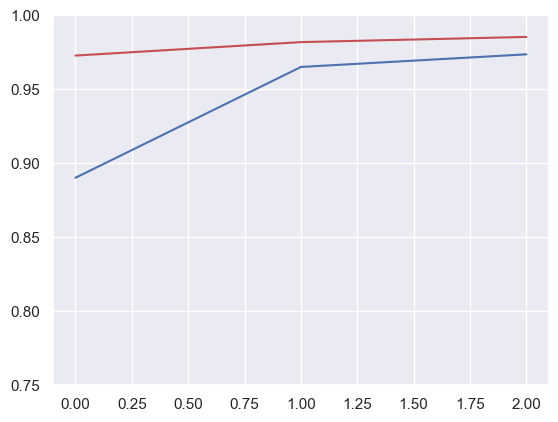

In [20]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
* is het netwerk onder- of over-trained?
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
* wat is sneller: het trainen of het testen?
* wat kun je nog doen om de nauwkeurigheid te verhogen?

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

## Evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?


